# Benji Wagner

# Homework 0

**1**. There is an SQLite3 database `flowers.db` in the `data` sub-directory. Read this into a `pandas` DataFrame, and show lines 5-10 of the DataFrame.

In [1]:
import pandas as pd
import sqlite3 as lite
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
conn = lite.connect("data/flowers.db")

In [3]:
df = pd.read_sql_query("select * from iris;", conn)

In [4]:
df[5:11]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa
10,5.4,3.7,1.5,0.2,setosa


**2**. Summmarize the mean and coefficient of variation of each measuremnt by `species`.

In [5]:
my_group = df.groupby("Species")

In [6]:
my_group.mean()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [7]:
def cv(std, mean):
    "finds the coefficient of variation given a mean and standard deviation"
    return std/mean

In [8]:
cv(my_group.std(), my_group.mean())

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,0.070413,0.110579,0.118785,0.428397
versicolor,0.086956,0.113285,0.110308,0.149135
virginica,0.096521,0.108439,0.099405,0.135563


**3**. Make a multi-plot figure containing boxplots where the x-axis is the Species and the y-axis is one of the four measurements.

In [9]:
df1 = pd.melt(df, id_vars=["Species"])

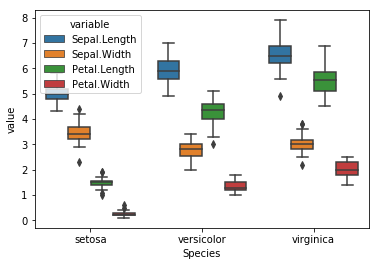

In [10]:
sns.boxplot(data = df1, x = "Species", y = "value", hue = "variable");
# Option 1: One figure with multiple boxplots

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


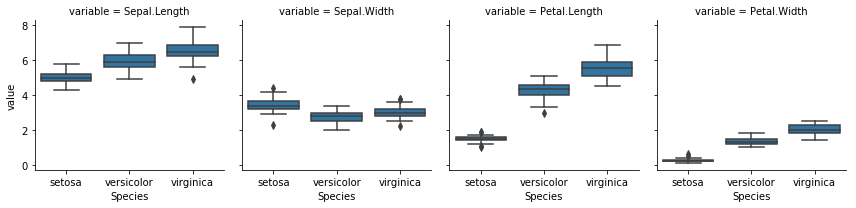

In [11]:
g = sns.FacetGrid(df1, col = "variable")
g = g.map(sns.boxplot, "Species", "value")
# Option 2: Multiple figures where each plot represents a different variable

**4**. Add 2 columns `pc1` and `pc2` to the Datafame, where `pc1` and `pc2` are the first two principal componennts of the 4 measurements. 

In [12]:
pca = PCA(n_components=2)

In [22]:
tmp = df.iloc[:, 0:4]
tmp_std = StandardScaler().fit_transform(tmp)
pc = pca.fit_transform(tmp_std)

In [23]:
pc.shape

(150, 2)

In [24]:
df["pc1"] = pc[:, 0:1]

In [25]:
df["pc2"] = pc[:, 1:2]

In [26]:
df[0:10]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,pc1,pc2
0,5.1,3.5,1.4,0.2,setosa,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,setosa,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,setosa,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,setosa,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,setosa,-2.389842,0.646835
5,5.4,3.9,1.7,0.4,setosa,-2.075631,1.489178
6,4.6,3.4,1.4,0.3,setosa,-2.444029,0.047644
7,5.0,3.4,1.5,0.2,setosa,-2.232847,0.223148
8,4.4,2.9,1.4,0.2,setosa,-2.334640,-1.115328
9,4.9,3.1,1.5,0.1,setosa,-2.184328,-0.469014


**5**. Save the DataFrame to a CSV file, not including the index.

In [27]:
df.to_csv("data/my_iris.csv", index = False)